In [17]:
import bayesflow.diagnostics as bfd
import matplotlib.pyplot as plt
from model import *
from IPython.display import Markdown, display

In [6]:
display(Markdown(latex_model))


\begin{equation}
\begin{aligned}
\alpha_k & \sim \text{Dirichlet}\Big((2, 2)\Big) & k \in \{1, 2\} \\
(\mu_1, \mu_2) & \sim \text{Normal}\Big((-1.5, 1.5), \mathbb{I} \Big)_{\mu_1 < \mu_2} \\
z_{1} & \sim \text{Categorical}\Big((0.5, 0.5)\Big) \\
z_{t} & \sim \text{Categorical}(\alpha_{z_{t-1}}) & t \in \{ 2, \dots, \text{T} \}\\
y_{t} & \sim \text{Normal}(\mu_{z_{t}}, 1) & t \in \{ 1, \dots, \text{T} \}
\end{aligned}
\end{equation}


In [14]:
df = model(5_000)

prior_unconstrained = df['prior_draws']
prior_constrained = constrain_parameters(prior_unconstrained)

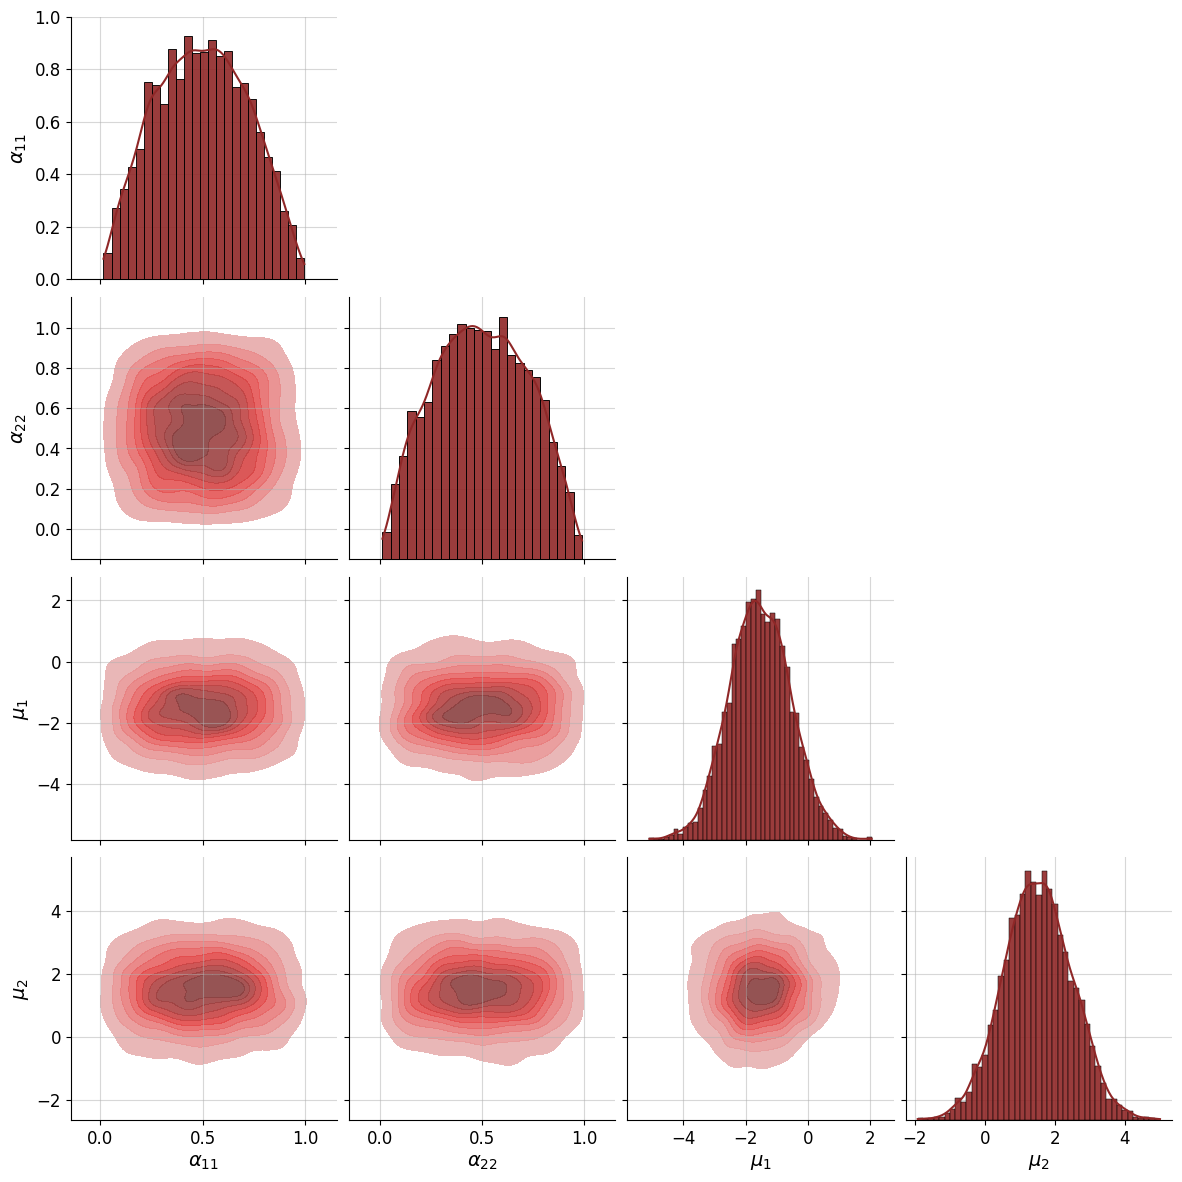

In [15]:
f = bfd.plot_posterior_2d(prior_constrained, param_names=constrained_parameter_names)

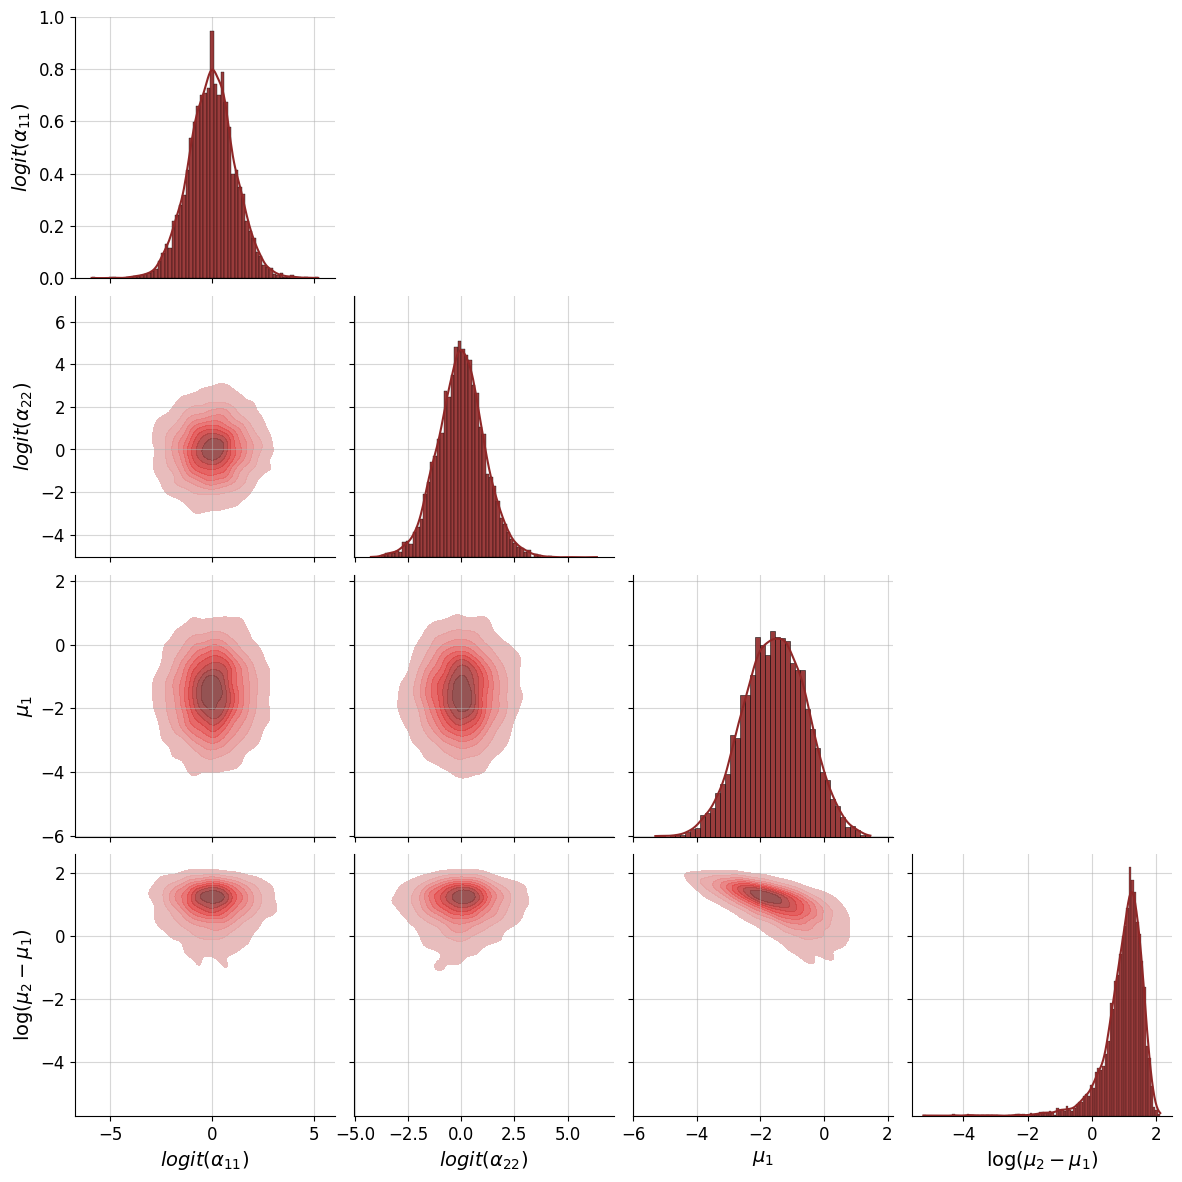

In [4]:
f = bfd.plot_posterior_2d(prior_unconstrained, param_names=model.param_names)

In [9]:
observables = configurator(df)['observables']
latents = configurator(df)['latents']

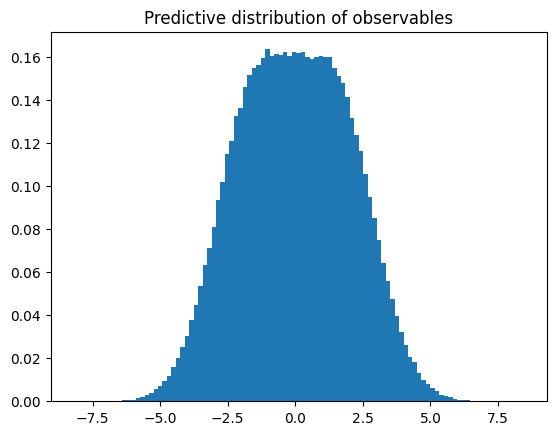

In [32]:
f = plt.hist(np.reshape(observables, (500_000, 1)), density=True, bins=101)
f = plt.title("Predictive distribution of observables")

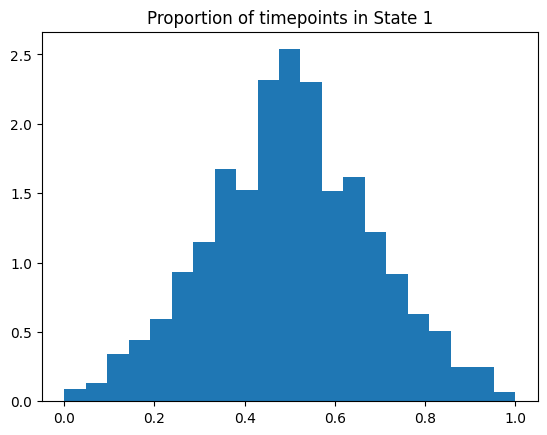

In [33]:
p = np.mean(latents, axis=1)[:,0]

f = plt.hist(p, density=True, bins=21)
f = plt.title("Proportion of timepoints in State 1")